# Affinity Propagation

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html

O Affinity Propagation é um algoritmo de Clustering relativamente novo baseado no conceito de "passagem de mensagens" entre pontos de dados. O AP não requer que o número de clusters seja determinado ou estimado antes de executar o algoritmo.

Como você identificaria um pequeno número de imagens de rostos que juntos representam com precisão um conjunto de dados de imagens de rosto? Como você identificaria um pequeno número de sentenças que refletem com precisão o conteúdo de um documento? Como você identificaria um pequeno número de cidades que são mais facilmente acessíveis de todas as outras cidades por companhia aérea comercial? Como você identificaria segmentos de DNA que refletissem as propriedades de expressão dos genes? 

O Affinity Propagation é um algoritmo que toma como medida de entrada a semelhança entre pares de pontos de dados e simultaneamente considera todos os pontos de dados como potenciais exemplares. Mensagens são trocadas entre os pontos de dados até que um conjunto de alta qualidade de exemplares e clusters correspondentes, gradualmente emerge. 

Utilizamos o Affinity Propagation para resolver uma variedade de problemas de agrupamento com erros muito menores do que os encontrados por outros métodos, o que ocorre geralmente em menos de um centésimo do tempo. 

O algoritmo define a afinidade dos pontos de dados alternando duas etapas de passagem de mensagem, para atualizar duas matrizes: a matriz de responsabilidade (R) e a matriz de disponibilidade (A). O Affinity Propagation cria clusters enviando mensagens entre pares de amostras até convergência. Um conjunto de dados é então descrito utilizando um pequeno número de exemplares, que são identificados como os mais representativos de outras amostras. As mensagens enviadas entre pares representam a adequação para uma amostra ser o exemplar da outra, que é atualizada em resposta aos valores de outros pares. Esta atualização acontece iterativamente até a convergência, altura em que os exemplares finais são escolhidos, e, portanto, o agrupamento final é dado.

O Affinity Propagation pode ser interessante, pois ele escolhe o número de clusters com base nos dados fornecidos. Para este efeito, os dois parâmetros importantes são a preferência, que controla quantos exemplares são utilizados, e o factor de amortecimento (damping factor). A principal desvantagem de Affinity Propagation é a sua complexidade. Isso torna o algoritmo mais apropriado para pequenos e médios conjuntos de dados.

## Exemplo 1

In [1]:
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn import metrics
%matplotlib inline

In [6]:
# Gerando conjunto de dados
centers = [[-1, 1], [1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples = 300, centers = centers, cluster_std = 0.5, random_state = 0)

In [7]:
# Criação do modelo
af = AffinityPropagation(preference = -50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

In [8]:
# Métricas
# Homogeneity: cada cluster contém apenas membros de uma única classe
# Completeness: todos os membros de uma classe estão atribuídos ao mesmo cluster
# V-measure: média harmônica entre os 2 anteriores
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneidade: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completude: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels, metric = 'sqeuclidean'))

Estimated number of clusters: 4
Homogeneidade: 0.837
Completude: 0.838
V-measure: 0.837
Silhouette Coefficient: 0.710


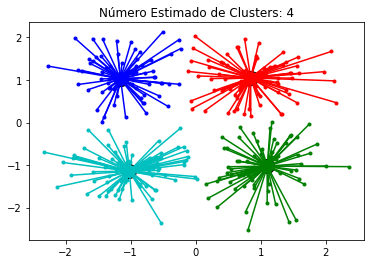

In [9]:
# Plot
plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Número Estimado de Clusters: %d' % n_clusters_)
plt.show()

## Exemplo 2

In [12]:
!pip install mplfinance

In [10]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.cluster import AffinityPropagation
from sklearn import cluster, covariance, manifold

In [13]:
# Obtém as cotações históricas do Yahoo
try:
     from mplfinance import quotes_historical_yahoo_ochl
except ImportError:
     from mplfinance import quotes_historical_yahoo as quotes_historical_yahoo_ochl

ImportError: cannot import name 'quotes_historical_yahoo' from 'mplfinance' (C:\Users\krupc\anaconda3\lib\site-packages\mplfinance\__init__.py)

In [14]:
# Definindo o período para coleta das cotações
d1 = datetime.datetime(2003, 1, 1)
d2 = datetime.datetime(2008, 1, 1)

In [15]:
# Dicionário de símbolos para as cotações de algumas empresas
symbol_dict = {
    'TOT': 'Total',
    'XOM': 'Exxon',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'VLO': 'Valero Energy',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'TWX': 'Time Warner',
    'CMCSA': 'Comcast',
    'CVC': 'Cablevision',
    'YHOO': 'Yahoo',
    'DELL': 'Dell',
    'HPQ': 'HP',
    'AMZN': 'Amazon',
    'TM': 'Toyota',
    'CAJ': 'Canon',
    'MTU': 'Mitsubishi',
    'SNE': 'Sony',
    'F': 'Ford',
    'HMC': 'Honda',
    'NAV': 'Navistar',
    'NOC': 'Northrop Grumman',
    'BA': 'Boeing',
    'KO': 'Coca Cola',
    'MMM': '3M',
    'MCD': 'Mc Donalds',
    'PEP': 'Pepsi',
    'MDLZ': 'Kraft Foods',
    'K': 'Kellogg',
    'UN': 'Unilever',
    'MAR': 'Marriott',
    'PG': 'Procter Gamble',
    'CL': 'Colgate-Palmolive',
    'GE': 'General Electrics',
    'WFC': 'Wells Fargo',
    'JPM': 'JPMorgan Chase',
    'AIG': 'AIG',
    'AXP': 'American express',
    'BAC': 'Bank of America',
    'GS': 'Goldman Sachs',
    'AAPL': 'Apple',
    'SAP': 'SAP',
    'CSCO': 'Cisco',
    'TXN': 'Texas instruments',
    'XRX': 'Xerox',
    'LMT': 'Lookheed Martin',
    'WMT': 'Wal-Mart',
    'WBA': 'Walgreen',
    'HD': 'Home Depot',
    'GSK': 'GlaxoSmithKline',
    'PFE': 'Pfizer',
    'SNY': 'Sanofi-Aventis',
    'NVS': 'Novartis',
    'KMB': 'Kimberly-Clark',
    'R': 'Ryder',
    'GD': 'General Dynamics',
    'RTN': 'Raytheon',
    'CVS': 'CVS',
    'CAT': 'Caterpillar',
    'DD': 'DuPont de Nemours'}

In [16]:
# Array dos itens do dicionário
symbols, names = np.array(list(symbol_dict.items())).T

In [17]:
symbols

array(['TOT', 'XOM', 'CVX', 'COP', 'VLO', 'MSFT', 'IBM', 'TWX', 'CMCSA',
       'CVC', 'YHOO', 'DELL', 'HPQ', 'AMZN', 'TM', 'CAJ', 'MTU', 'SNE',
       'F', 'HMC', 'NAV', 'NOC', 'BA', 'KO', 'MMM', 'MCD', 'PEP', 'MDLZ',
       'K', 'UN', 'MAR', 'PG', 'CL', 'GE', 'WFC', 'JPM', 'AIG', 'AXP',
       'BAC', 'GS', 'AAPL', 'SAP', 'CSCO', 'TXN', 'XRX', 'LMT', 'WMT',
       'WBA', 'HD', 'GSK', 'PFE', 'SNY', 'NVS', 'KMB', 'R', 'GD', 'RTN',
       'CVS', 'CAT', 'DD'], dtype='<U17')

In [18]:
names

array(['Total', 'Exxon', 'Chevron', 'ConocoPhillips', 'Valero Energy',
       'Microsoft', 'IBM', 'Time Warner', 'Comcast', 'Cablevision',
       'Yahoo', 'Dell', 'HP', 'Amazon', 'Toyota', 'Canon', 'Mitsubishi',
       'Sony', 'Ford', 'Honda', 'Navistar', 'Northrop Grumman', 'Boeing',
       'Coca Cola', '3M', 'Mc Donalds', 'Pepsi', 'Kraft Foods', 'Kellogg',
       'Unilever', 'Marriott', 'Procter Gamble', 'Colgate-Palmolive',
       'General Electrics', 'Wells Fargo', 'JPMorgan Chase', 'AIG',
       'American express', 'Bank of America', 'Goldman Sachs', 'Apple',
       'SAP', 'Cisco', 'Texas instruments', 'Xerox', 'Lookheed Martin',
       'Wal-Mart', 'Walgreen', 'Home Depot', 'GlaxoSmithKline', 'Pfizer',
       'Sanofi-Aventis', 'Novartis', 'Kimberly-Clark', 'Ryder',
       'General Dynamics', 'Raytheon', 'CVS', 'Caterpillar',
       'DuPont de Nemours'], dtype='<U17')

In [ ]:
# Usando List Comprehension para obter as cotações
quotes = [quotes_historical_yahoo_ochl(symbol, d1, d2, asobject = True) for symbol in symbols]

In [ ]:
quotes

In [ ]:
# Valor das cotações abertura e encerramento
open = np.array([q.open for q in quotes]).astype(np.float)
close = np.array([q.close for q in quotes]).astype(np.float)

In [ ]:
# Variação diária
variation = close - open

In [ ]:
edge_model = covariance.GraphLassoCV()

In [ ]:
# Padronizando a série temporal. 
# Usando correlação ao invés de covariância, pois aumenta a eficiência da estrutura de dados
X = variation.copy().T
X /= X.std(axis=0)
edge_model.fit(X)

In [ ]:
# Criando o modelo AP
_, labels = cluster.affinity_propagation(edge_model.covariance_)
n_labels = labels.max()

In [ ]:
# Imprimindo os clusters gerados
for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

In [ ]:
# Reduzindo a dimensionalidade
node_position_model = manifold.LocallyLinearEmbedding(n_components = 2, eigen_solver = 'dense', n_neighbors = 6)
embedding = node_position_model.fit_transform(X.T).T

In [ ]:
# Plot
plt.figure(1, facecolor = 'w', figsize = (10, 8))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

# Gráfico com correlações parciais
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Plot dos nodes
plt.scatter(embedding[0], embedding[1], s=100 * d ** 2, c=labels, cmap=plt.cm.spectral)

# Plot dos edges
start_idx, end_idx = np.where(non_zero)

# Segmentos
segments = [[embedding[:, start], embedding[:, stop]] for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Adicionando Labels
for index, (name, label, (x, y)) in enumerate(
        zip(names, labels, embedding.T)):

    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=10,
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.spectral(label / float(n_labels)),
                       alpha=.6))

plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())

plt.show()